# **교통 데이터: 지리 데이터 시각화**

## **데이터 살펴보기**

[서울 열린데이터 광장](http://data.seoul.go.kr/dataList/OA-12252/S/1/datasetView.do)

In [12]:
import pandas as pd
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [13]:
data = pd.read_csv('C:/Users/82105/Desktop/csv파일/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv', encoding = 'cp949')

In [14]:
data.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202307,1호선,동대문,710,31,11581,2095,9027,6829,14177,...,8930,511,2412,0,216,0,0,0,0,20230803
1,202307,1호선,동묘앞,221,2,3012,1090,3682,5042,7336,...,4195,104,1649,0,272,0,0,0,0,20230803
2,202307,1호선,서울역,577,37,8434,9396,13088,51243,40143,...,13987,2297,2598,1,219,0,0,0,0,20230803
3,202307,1호선,시청,49,5,2381,4825,3784,22736,7558,...,4285,287,1085,0,12,0,0,0,0,20230803
4,202307,1호선,신설동,392,35,8967,2356,9520,8509,21822,...,9505,317,2244,0,0,0,0,0,0,20230803


- 서울시 지하철 승하차인원의 월별 합계

- 2018년 이후, 2호선만, 승차 인원만 분석 예정

## **질문 만들기**

- 승차 인원이 가장 많은 역은?
- 연도별로 혹은 월별로 승차 인원 추이에 차이가 있는가?
- 시간대별로 가장 승차인원이 많은 역은?
- 지하철역 시간대별 인원 유형 군집화
- 지도에 분석 결과를 시각화하기

## **데이터 전처리**

- 날짜 컬럼 추가

In [15]:
data['연도'] = pd.to_datetime(data['사용월'], format='%Y%m').dt.year
data['월'] = pd.to_datetime(data['사용월'], format='%Y%m').dt.month

data.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자,연도,월
0,202307,1호선,동대문,710,31,11581,2095,9027,6829,14177,...,2412,0,216,0,0,0,0,20230803,2023,7
1,202307,1호선,동묘앞,221,2,3012,1090,3682,5042,7336,...,1649,0,272,0,0,0,0,20230803,2023,7
2,202307,1호선,서울역,577,37,8434,9396,13088,51243,40143,...,2598,1,219,0,0,0,0,20230803,2023,7
3,202307,1호선,시청,49,5,2381,4825,3784,22736,7558,...,1085,0,12,0,0,0,0,20230803,2023,7
4,202307,1호선,신설동,392,35,8967,2356,9520,8509,21822,...,2244,0,0,0,0,0,0,20230803,2023,7


- 2018년 이후, 2호선만 필터링

In [16]:
data = data.query('호선명 == "2호선" and 연도 >= 2018')

- 지하철역명 통일

In [17]:
sorted(data['지하철역'].unique())

['강남',
 '강변(동서울터미널)',
 '건대입구',
 '교대(법원.검찰청)',
 '구로디지털단지',
 '구의(광진구청)',
 '낙성대',
 '낙성대(강감찬)',
 '당산',
 '대림(구로구청)',
 '도림천',
 '동대문역사문화공원',
 '동대문역사문화공원(DDP)',
 '뚝섬',
 '문래',
 '방배',
 '봉천',
 '사당',
 '삼성(무역센터)',
 '상왕십리',
 '서울대입구(관악구청)',
 '서초',
 '선릉',
 '성수',
 '시청',
 '신답',
 '신당',
 '신대방',
 '신도림',
 '신림',
 '신설동',
 '신정네거리',
 '신촌',
 '아현',
 '양천구청',
 '역삼',
 '영등포구청',
 '왕십리(성동구청)',
 '용답',
 '용두(동대문구청)',
 '을지로3가',
 '을지로4가',
 '을지로입구',
 '이대',
 '잠실(송파구청)',
 '잠실나루',
 '잠실새내',
 '종합운동장',
 '충정로(경기대입구)',
 '한양대',
 '합정',
 '홍대입구']

In [18]:
data['지하철역'] = [i[0] for i in data['지하철역'].str.split('(')]
sorted(data['지하철역'].unique())

['강남',
 '강변',
 '건대입구',
 '교대',
 '구로디지털단지',
 '구의',
 '낙성대',
 '당산',
 '대림',
 '도림천',
 '동대문역사문화공원',
 '뚝섬',
 '문래',
 '방배',
 '봉천',
 '사당',
 '삼성',
 '상왕십리',
 '서울대입구',
 '서초',
 '선릉',
 '성수',
 '시청',
 '신답',
 '신당',
 '신대방',
 '신도림',
 '신림',
 '신설동',
 '신정네거리',
 '신촌',
 '아현',
 '양천구청',
 '역삼',
 '영등포구청',
 '왕십리',
 '용답',
 '용두',
 '을지로3가',
 '을지로4가',
 '을지로입구',
 '이대',
 '잠실',
 '잠실나루',
 '잠실새내',
 '종합운동장',
 '충정로',
 '한양대',
 '합정',
 '홍대입구']

- 승차 인원만 추출하기

In [19]:
on_col = [i for i in data.columns if '승차' in i]
data = data[['사용월','연도','월','지하철역']+on_col]

data.head()

,사용월,연도,월,지하철역,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,...,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원
10,202307,2023,7,강남,120,9359,18503,40112,64256,52713,...,327480,215011,172551,196756,177694,80992,13773,3,0,0
11,202307,2023,7,강변,27,8936,28877,78164,117728,82763,...,61291,43557,32792,27539,19267,7874,1058,1,0,0
12,202307,2023,7,건대입구,290,16965,22074,53127,91248,61438,...,85337,64419,65838,72636,74202,45555,7559,3,0,0
13,202307,2023,7,교대,15,2693,11535,25250,36820,27461,...,133358,62654,51239,53658,42819,15754,3171,2,0,0
14,202307,2023,7,구로디지털단지,369,38505,53882,144838,184498,112257,...,210532,101581,65184,55202,41572,18845,3463,6,0,0


## **분석**

### [1] 승차 인원이 가장 많은 역은?

- 합계 컬럼 만들기

In [20]:
data['합계'] = data[on_col].sum(axis=1)

data.head()

,사용월,연도,월,지하철역,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,...,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원,합계
10,202307,2023,7,강남,120,9359,18503,40112,64256,52713,...,215011,172551,196756,177694,80992,13773,3,0,0,2408376
11,202307,2023,7,강변,27,8936,28877,78164,117728,82763,...,43557,32792,27539,19267,7874,1058,1,0,0,933338
12,202307,2023,7,건대입구,290,16965,22074,53127,91248,61438,...,64419,65838,72636,74202,45555,7559,3,0,0,1060476
13,202307,2023,7,교대,15,2693,11535,25250,36820,27461,...,62654,51239,53658,42819,15754,3171,2,0,0,852909
14,202307,2023,7,구로디지털단지,369,38505,53882,144838,184498,112257,...,101581,65184,55202,41572,18845,3463,6,0,0,1629379


- 지하철역별 월평균 승차 인원 구하기

In [21]:
data_mean = data.groupby('지하철역')[['합계']].mean().reset_index().rename({'합계':'월평균'}, axis=1).sort_values('월평균', ascending=False)
data_mean

,지하철역,월평균
0,강남,2.475218e+06
42,잠실,2.185502e+06
49,홍대입구,1.895644e+06
27,신림,1.815902e+06
4,구로디지털단지,1.656332e+06
16,삼성,1.496685e+06
26,신도림,1.481450e+06
20,선릉,1.463946e+06
18,서울대입구,1.390678e+06
33,역삼,1.286969e+06


In [22]:
fig = px.bar(data_frame = data_mean, x='지하철역', y='월평균', title='지하철역별 월평균 승차인원')
fig.show()

### [2] 연도별로 혹은 월별로 승차 인원 추이에 차이가 있는가?

In [23]:
data.head()

,사용월,연도,월,지하철역,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,...,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원,합계
10,202307,2023,7,강남,120,9359,18503,40112,64256,52713,...,215011,172551,196756,177694,80992,13773,3,0,0,2408376
11,202307,2023,7,강변,27,8936,28877,78164,117728,82763,...,43557,32792,27539,19267,7874,1058,1,0,0,933338
12,202307,2023,7,건대입구,290,16965,22074,53127,91248,61438,...,64419,65838,72636,74202,45555,7559,3,0,0,1060476
13,202307,2023,7,교대,15,2693,11535,25250,36820,27461,...,62654,51239,53658,42819,15754,3171,2,0,0,852909
14,202307,2023,7,구로디지털단지,369,38505,53882,144838,184498,112257,...,101581,65184,55202,41572,18845,3463,6,0,0,1629379


In [24]:
year_sum = data.query('연도 <= 2022').groupby(['연도'])[['합계']].sum().reset_index()
year_sum['연도'] = year_sum['연도'].astype(str)

fig = px.line(data_frame=year_sum, x='연도', y='합계')
fig.show()

In [25]:
month_sum = data.query('연도 <= 2022').groupby(['월'])[['합계']].sum().reset_index()
month_sum['월'] = month_sum['월'].astype(str)

fig = px.line(data_frame=month_sum, x='월', y='합계')
fig.show()

### [3] 시간대별로 가장 승차인원이 많은 역은?

In [26]:
top10 = data_mean.sort_values('월평균', ascending=False).head(10)['지하철역']
top10

0          강남
42         잠실
49       홍대입구
27         신림
4     구로디지털단지
16         삼성
26        신도림
20         선릉
18      서울대입구
33         역삼
Name: 지하철역, dtype: object

In [27]:
#주요 역 10개만 필터링하여 시간당 월평균 인원수 구하기
top10 = data_mean.sort_values('월평균', ascending=False).head(10)['지하철역']
top10_mean_hour = data.query('지하철역 in @top10').groupby('지하철역')[on_col].mean()
top10_mean_hour.columns = [i[:3] for i in top10_mean_hour.columns]

In [28]:
#전체 기준 히트맵
top10_mean_hour.style.background_gradient(cmap='pink_r', axis=None).format('{:.0f}')

,04시,05시,06시,07시,08시,09시,10시,11시,12시,13시,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시,00시,01시,02시,03시
지하철역,,,,,,,,,,,,,,,,,,,,,,,,
강남,200,11268,20092,40044,64828,54186,54051,72620,92870,115657,122541,149213,170881,240434,343753,223735,178880,216217,207535,83943,12218,42,10,1
구로디지털단지,251,39289,52406,137133,182999,115665,68660,61428,66486,68083,61964,64823,77632,122631,223310,115340,69855,60133,46034,19676,2522,12,1,0
삼성,166,4759,7509,15994,21927,22378,24176,35510,45498,60130,74138,94213,115663,188316,294941,168625,123201,105947,71970,19138,2394,60,30,1
서울대입구,4148,28407,42982,125994,180686,119476,68434,61264,66588,71341,64633,68216,75435,85348,95359,59847,50128,52081,46057,21462,2780,10,2,0
선릉,102,4914,11078,21083,32791,31823,34649,45507,53924,63801,72065,90514,121775,169803,283547,143360,89939,91231,73719,25120,3186,10,2,0
신도림,3362,35786,50420,134114,140965,89916,61495,60290,68700,72646,72069,75747,83664,101420,134346,81202,68744,70103,52678,21723,2044,16,2,0
신림,284,39890,75300,204526,305088,182739,98890,82922,87596,84727,76579,75055,81788,88834,93013,63213,52872,51414,45214,22745,3192,18,2,0
역삼,44,3807,8616,14900,25532,23782,24348,32904,40367,49071,56615,73720,92117,174617,274456,141884,83333,84077,58586,21396,2791,6,1,0
잠실,92,12149,46134,115526,166209,120829,81041,81279,90041,100345,105703,121147,142022,182116,231972,159950,157380,137990,100086,30282,3182,25,2,0


In [29]:
#행 기준 히트맵
top10_mean_hour.style.background_gradient(cmap='pink_r', axis=1).format('{:.0f}')

,04시,05시,06시,07시,08시,09시,10시,11시,12시,13시,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시,00시,01시,02시,03시
지하철역,,,,,,,,,,,,,,,,,,,,,,,,
강남,200,11268,20092,40044,64828,54186,54051,72620,92870,115657,122541,149213,170881,240434,343753,223735,178880,216217,207535,83943,12218,42,10,1
구로디지털단지,251,39289,52406,137133,182999,115665,68660,61428,66486,68083,61964,64823,77632,122631,223310,115340,69855,60133,46034,19676,2522,12,1,0
삼성,166,4759,7509,15994,21927,22378,24176,35510,45498,60130,74138,94213,115663,188316,294941,168625,123201,105947,71970,19138,2394,60,30,1
서울대입구,4148,28407,42982,125994,180686,119476,68434,61264,66588,71341,64633,68216,75435,85348,95359,59847,50128,52081,46057,21462,2780,10,2,0
선릉,102,4914,11078,21083,32791,31823,34649,45507,53924,63801,72065,90514,121775,169803,283547,143360,89939,91231,73719,25120,3186,10,2,0
신도림,3362,35786,50420,134114,140965,89916,61495,60290,68700,72646,72069,75747,83664,101420,134346,81202,68744,70103,52678,21723,2044,16,2,0
신림,284,39890,75300,204526,305088,182739,98890,82922,87596,84727,76579,75055,81788,88834,93013,63213,52872,51414,45214,22745,3192,18,2,0
역삼,44,3807,8616,14900,25532,23782,24348,32904,40367,49071,56615,73720,92117,174617,274456,141884,83333,84077,58586,21396,2791,6,1,0
잠실,92,12149,46134,115526,166209,120829,81041,81279,90041,100345,105703,121147,142022,182116,231972,159950,157380,137990,100086,30282,3182,25,2,0


### [4] 지하철역 시간대별 인원 유형 군집화

- 승차 인원으로 유형 군집화

In [30]:
hour_mean = data.groupby('지하철역')[on_col].mean()
hour_mean.columns = [i[:3] for i in hour_mean.columns]
hour_mean_pct = hour_mean.div(hour_mean.sum(axis=1), axis=0)

In [33]:
!pip install yellowbrick

   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ---------------------------------------- 282.6/282.6 kB 8.5 MB/s eta 0:00:00


KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10))

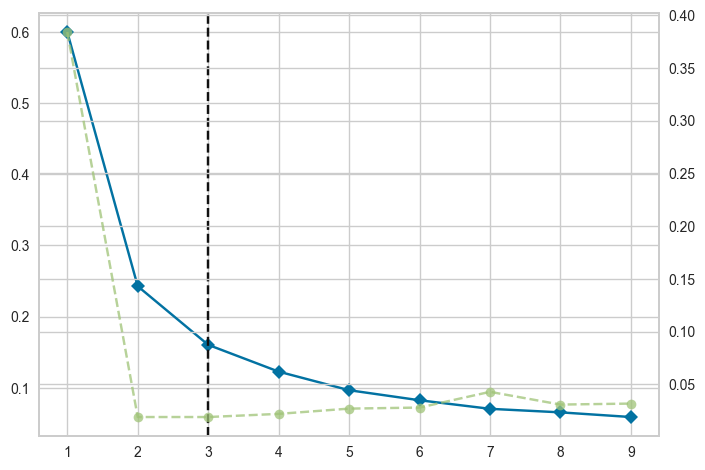

In [34]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(hour_mean_pct)

In [35]:
k = 3
model = KMeans(n_clusters = k, random_state = 10) #KMeans 모델을 정의
model.fit(hour_mean_pct) #학습
hour_mean_pct['cluster'] = model.fit_predict(hour_mean_pct).astype(str) #클러스터 열 만들기

In [36]:
fig = px.scatter(data_frame = hour_mean_pct[['08시','18시','cluster']].reset_index(), x='08시', y='18시', color='cluster', width=700, height=600, title='시간대별 승차 인원 비중 군집화', hover_name='지하철역')
fig.show()

In [37]:
for i in range(k):
    print(f'cluster {i}')
    print(list(hour_mean_pct.query(f'cluster == "{i}"').index))

cluster 0
['건대입구', '구로디지털단지', '당산', '도림천', '문래', '방배', '사당', '신당', '신도림', '신설동', '신촌', '영등포구청', '왕십리', '이대', '잠실', '종합운동장', '충정로', '합정', '홍대입구']
cluster 1
['강남', '교대', '동대문역사문화공원', '뚝섬', '삼성', '서초', '선릉', '성수', '시청', '역삼', '을지로3가', '을지로4가', '을지로입구', '한양대']
cluster 2
['강변', '구의', '낙성대', '대림', '봉천', '상왕십리', '서울대입구', '신답', '신대방', '신림', '신정네거리', '아현', '양천구청', '용답', '용두', '잠실나루', '잠실새내']


### [5] 지도에 분석 결과를 시각화

-  8시 승차 인원과 18시 승차 인원을 지도에 시각화 해보자

- 지하철역별 위도 경도 데이터 전처리

In [38]:
coordinate = pd.read_csv('C:/Users/82105/Desktop/csv파일/서울시 역사마스터 정보.csv', encoding='cp949')
coordinate.head()

,역사_ID,역사명,호선,위도,경도
0,9996,미사,5호선,37.560927,127.193877
1,9995,강일,5호선,37.557490,127.175930
2,4929,김포공항,김포골드라인,37.562360,126.801868
3,4928,고촌,김포골드라인,37.601243,126.770345
4,4927,풍무,김포골드라인,37.612488,126.732387


In [39]:
coordinate = coordinate.query('호선 == "2호선"')
coordinate['역사명'] = [i[0] for i in coordinate['역사명'].str.split('(')]
coordinate.rename({'역사명':'지하철역'}, axis=1, inplace=True)
coordinate

,역사_ID,지하철역,호선,위도,경도
708,250,용두,2호선,37.574028,127.038091
709,249,신정네거리,2호선,37.520074,126.852912
710,248,양천구청,2호선,37.512398,126.865819
711,247,도림천,2호선,37.514287,126.882768
712,246,신설동,2호선,37.574747,127.024932
713,245,신답,2호선,37.570040,127.046481
714,244,용답,2호선,37.561904,127.050899
715,243,충정로,2호선,37.559704,126.964378
716,242,아현,2호선,37.557345,126.956141
717,241,이대,2호선,37.556733,126.946013


In [40]:
hour_mean_merge = hour_mean.reset_index()[['지하철역','08시','18시']]
coordinate_merge = coordinate[['지하철역','위도','경도']]
hour_mean_coor = pd.merge(hour_mean_merge, coordinate_merge, on='지하철역')

In [41]:
hour_mean_coor['cluster'] = model.fit_predict(hour_mean_pct).astype(str)
hour_mean_coor.head()

,지하철역,08시,18시,위도,경도,cluster
0,강남,64827.731343,343752.835821,37.497990,127.027912,0
1,강변,119168.985075,71631.000000,37.535095,127.094681,1
2,건대입구,94501.731343,89339.671642,37.540373,127.069191,2
3,교대,37022.164179,144218.925373,37.493961,127.014667,0
4,구로디지털단지,182999.328358,223309.611940,37.485266,126.901401,2


- 지도에 시각화

In [42]:
import folium
from folium import plugins

In [44]:
center = [37.541, 126.986] #서울 중간

m = folium.Map(location=center, zoom_start=12)
m.add_child(plugins.HeatMap(zip(hour_mean_coor['위도'], hour_mean_coor['경도'], hour_mean_coor['08시'])))

m

In [45]:
m = folium.Map(location=center, zoom_start=12)
m.add_child(plugins.HeatMap(zip(hour_mean_coor['위도'], hour_mean_coor['경도'], hour_mean_coor['18시'])))
m

- 승차 인원 유형을 지도에 시각화

In [46]:
m = folium.Map(location=center, zoom_start=12)

for idx in hour_mean_coor.index:
    lat = hour_mean_coor.loc[idx, '위도']
    long = hour_mean_coor.loc[idx, '경도']
    title = hour_mean_coor.loc[idx, '지하철역']

    if hour_mean_coor.loc[idx, 'cluster'] == "0":
        color = '#000000'
    elif hour_mean_coor.loc[idx, 'cluster'] == "1":
        color = '#3A01DF'
    else:
        color = '#DF0101'

    folium.CircleMarker([lat, long]
                        , radius=18
                        , color = color
                        , fill = color
                        , tooltip = title).add_to(m)
m

## **정리**

[1] 승하차 인원이 가장 많은 역은?
- 강남, 잠실, 홍대입구, 신림, 구로디지털단지...

[2] 연도별로 혹은 월별로 승차 인원 추이에 차이가 있는가?
- 코로나가 시작된 2020년, 2021년에 인원이 많이 줄었고 2022년도부터 다시 회복 중

[3] 시간대별로 가장 승차인원이 많은 역은?
- 아침에 비교적 승차 인원이 많은 역과 저녁에 비교적 승차 인원이 많은 역이 있음을 히트맵으로 파악

[4] 지하철역 시간대별 인원 유형 군집화

    cluster 0: 아침과 저녁 승차인원 비율이 비교적 비슷
    ['건대입구', '구로디지털단지', '당산', '도림천', '문래', '방배', '사당', '신당', '신도림', '신설동', '신촌', '영등포구청', '왕십리', '이대', '잠실', '종합운동장', '충정로', '합정', '홍대입구']
    cluster 1: 저녁 승차인원 비율이 높음
    ['강남', '교대', '동대문역사문화공원', '뚝섬', '삼성', '서초', '선릉', '성수', '시청', '역삼', '을지로3가', '을지로4가', '을지로입구', '한양대']
    cluster 2: 아침 승차인원 비율이 높음
    ['강변', '구의', '낙성대', '대림', '봉천', '상왕십리', '서울대입구', '신답', '신대방', '신림', '신정네거리', '아현', '양천구청', '용답', '용두', '잠실나루', '잠실새내']

[5] 지도에 분석 결과를 시각화
- cluster 0: 주거와 상업 시설, 회사가 비슷하게 분포한 지역
- cluster 1: 회사가 많이 분포한 지역
- cluster 2: 주거 지역이 많이 분포한 지역